In [1]:
import pandas as pd

import random

f= "accepted_2007_to_2018Q4.csv"

num_lines = sum(1 for i in open(f))

num_lines

size= 2_200_000

size

ids= random.sample(range (1, num_lines),size)

len(ids)

df= pd.read_csv(f, skiprows= ids)

df.head()

/tmp/ipykernel_17258/3769484094.py:19: DtypeWarning: Columns (0,19,59,118,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv(f, skiprows= ids)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68476715,NaN,6000.0,6000.0,6000.0,36 months,7.49,186.61,A,A4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68615169,NaN,16000.0,16000.0,16000.0,60 months,8.49,328.19,B,B1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68537594,NaN,5000.0,5000.0,5000.0,36 months,7.91,156.48,A,A5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,68616867,NaN,16000.0,16000.0,16000.0,60 months,14.85,379.39,C,C5,...,12014.81,6.27,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68596872,NaN,8000.0,8000.0,8000.0,36 months,5.32,240.92,A,A1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
import pandas as pd
import random

f = "accepted_2007_to_2018Q4.csv"

def limpieza_data():
    num_lines = sum(1 for i in open(f))

    size = 2_200_000
    ids = random.sample(range(1, num_lines), size)

    column_types = {
        '0': 'str',      
        '19': 'float',
        '59': 'str',
        '118': 'str',
        '129': 'float',
        '130': 'float',
        '131': 'str',
        '134': 'str',
        '135': 'float',
        '136': 'str',
        '139': 'float',
    }

    df = pd.read_csv(f, skiprows=ids, low_memory=False, dtype=column_types)

    # Limpieza de NaNs
    num = 150000
    num_nans = df.isnull().sum()
    columns_menos_nans = num_nans[num_nans < num].index
    df_sin_nans = df[columns_menos_nans]

    # Selección de columnas útiles
    df_limpio = df_sin_nans[[
        "id",
        "loan_amnt",
        "funded_amnt",
        "term",
        "int_rate",
        "installment",
        "grade",
        "emp_length",
        "annual_inc",
        "dti",
        "fico_range_high",
        "fico_range_low",
        "revol_util",
        "loan_status",
        "out_prncp",
        "total_rec_prncp",
        "total_rec_int",
        "last_fico_range_high",
        "last_fico_range_low",
        "open_acc",
        "pub_rec",
        "inq_last_6mths",
        "purpose",
        "home_ownership",
        "recoveries",
        "num_tl_90g_dpd_24m",
        "delinq_2yrs"
    ]]

    return df_limpio

df_limpio = limpieza_data()


In [3]:
df_limpio.to_csv("df_limpio_procesado.csv", index=False)


In [4]:
print(df_limpio.head())

         id  loan_amnt  funded_amnt        term  int_rate  installment grade  \
0  68466916    25000.0      25000.0   36 months      7.49       777.55     A   
1  68426865    20000.0      20000.0   36 months     14.85       691.84     C   
2  68394562    30000.0      30000.0   36 months     15.77      1051.31     D   
3  68376953    20000.0      20000.0   36 months     11.99       664.20     C   
4  68537434    16000.0      16000.0   60 months     11.48       351.73     B   

  emp_length  annual_inc    dti  ...  last_fico_range_high  \
0  10+ years    109000.0  26.02  ...                 724.0   
1    6 years    110000.0  12.45  ...                 694.0   
2    2 years    175000.0  18.50  ...                 734.0   
3  10+ years     78000.0  27.10  ...                 579.0   
4    6 years     65000.0  21.16  ...                 644.0   

   last_fico_range_low  open_acc pub_rec  inq_last_6mths             purpose  \
0                720.0       9.0     0.0             1.0  debt_con

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.set_option("display.max_columns", None)
df_limpio

,id,loan_amnt,funded_amnt,term,int_rate,installment,grade,emp_length,annual_inc,dti,fico_range_high,fico_range_low,revol_util,loan_status,out_prncp,total_rec_prncp,total_rec_int,last_fico_range_high,last_fico_range_low,open_acc,pub_rec,inq_last_6mths,purpose,home_ownership,recoveries,num_tl_90g_dpd_24m,delinq_2yrs
0,68466916,25000.0,25000.0,36 months,7.49,777.55,A,10+ years,109000.0,26.02,749.0,745.0,54.3,Fully Paid,0.00,25000.00,1224.23,724.0,720.0,9.0,0.0,1.0,debt_consolidation,MORTGAGE,0.0,0.0,0.0
1,68426865,20000.0,20000.0,36 months,14.85,691.84,C,6 years,110000.0,12.45,694.0,690.0,84.5,Fully Paid,0.00,20000.00,4889.01,694.0,690.0,8.0,0.0,0.0,credit_card,RENT,0.0,0.0,0.0
2,68394562,30000.0,30000.0,36 months,15.77,1051.31,D,2 years,175000.0,18.50,729.0,725.0,50.3,Fully Paid,0.00,30000.00,3903.77,734.0,730.0,9.0,0.0,1.0,home_improvement,MORTGAGE,0.0,0.0,0.0
3,68376953,20000.0,20000.0,36 months,11.99,664.20,C,10+ years,78000.0,27.10,709.0,705.0,48.2,Charged Off,0.00,12522.42,3417.20,579.0,575.0,15.0,0.0,0.0,debt_consolidation,MORTGAGE,1650.0,0.0,0.0
4,68537434,16000.0,16000.0,60 months,11.48,351.73,B,6 years,65000.0,21.16,709.0,705.0,53.9,Charged Off,0.00,3188.01,2112.17,644.0,640.0,13.0,1.0,0.0,debt_consolidation,RENT,1746.8,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60696,90304259,35000.0,35000.0,60 months,15.59,843.53,C,10+ years,180000.0,13.09,694.0,690.0,91.0,Fully Paid,0.00,35000.00,1934.34,714.0,710.0,17.0,0.0,3.0,debt_consolidation,MORTGAGE,0.0,0.0,2.0
60697,88948489,25000.0,25000.0,60 months,15.59,602.52,C,10+ years,70000.0,31.49,704.0,700.0,67.3,Current,15294.23,9705.77,7713.18,684.0,680.0,21.0,0.0,1.0,debt_consolidation,MORTGAGE,0.0,0.0,0.0
60698,88892395,18000.0,18000.0,60 months,8.99,373.57,B,10+ years,110000.0,13.96,689.0,685.0,47.8,Current,10299.59,7700.41,3124.13,674.0,670.0,10.0,0.0,0.0,debt_consolidation,MORTGAGE,0.0,0.0,1.0
60699,89818294,21000.0,21000.0,60 months,14.49,493.99,C,< 1 year,48000.0,27.00,674.0,670.0,63.7,Current,12710.56,8289.44,6120.80,634.0,630.0,13.0,0.0,0.0,debt_consolidation,RENT,0.0,0.0,0.0


In [6]:
print(df_limpio.shape)
print(df_limpio.dtypes)

(60701, 27)
id                       object
loan_amnt               float64
funded_amnt             float64
term                     object
int_rate                float64
installment             float64
grade                    object
emp_length               object
annual_inc              float64
dti                     float64
fico_range_high         float64
fico_range_low          float64
revol_util              float64
loan_status              object
out_prncp               float64
total_rec_prncp         float64
total_rec_int           float64
last_fico_range_high    float64
last_fico_range_low     float64
open_acc                float64
pub_rec                 float64
inq_last_6mths          float64
purpose                  object
home_ownership           object
recoveries              float64
num_tl_90g_dpd_24m      float64
delinq_2yrs             float64
dtype: object


In [7]:
print(df_limpio.describe())

          loan_amnt   funded_amnt      int_rate   installment    annual_inc  \
count  60700.000000  60700.000000  60700.000000  60700.000000  6.070000e+04   
mean   15046.044481  15039.646211     13.111946    446.595418  7.807029e+04   
std     9190.493694   9188.105402      4.829169    268.418108  7.839711e+04   
min      500.000000    500.000000      5.310000     15.670000  0.000000e+00   
25%     8000.000000   8000.000000      9.580000    252.280000  4.600000e+04   
50%    12800.000000  12800.000000     12.620000    378.590000  6.500000e+04   
75%    20000.000000  20000.000000     15.990000    592.237500  9.300000e+04   
max    40000.000000  40000.000000     30.990000   1577.100000  9.300086e+06   

                dti  fico_range_high  fico_range_low    revol_util  \
count  60647.000000     60700.000000    60700.000000  60650.000000   
mean      18.832928       702.550659      698.550494     50.236680   
std       13.563388        33.118522       33.117791     24.673215   
min     

In [8]:
print(df_limpio.isnull().sum())

id                         0
loan_amnt                  1
funded_amnt                1
term                       1
int_rate                   1
installment                1
grade                      1
emp_length              3973
annual_inc                 1
dti                       54
fico_range_high            1
fico_range_low             1
revol_util                51
loan_status                1
out_prncp                  1
total_rec_prncp            1
total_rec_int              1
last_fico_range_high       1
last_fico_range_low        1
open_acc                   3
pub_rec                    3
inq_last_6mths             3
purpose                    1
home_ownership             1
recoveries                 1
num_tl_90g_dpd_24m      1908
delinq_2yrs                3
dtype: int64


In [9]:
print(df_limpio[df_limpio["loan_amnt"].astype(str).str.contains("Total amount funded", na = False)])

df_limpio = df_limpio[~df_limpio["loan_amnt"].astype(str).str.contains("Total amount funded", na = False)]
print(df_limpio[df_limpio["loan_amnt"].astype(str).str.contains("Total amount funded", na = False)])

df_limpio["int_rate"] = df_limpio["int_rate"].astype(str).str.rstrip("%")
df_limpio["int_rate"] = pd.to_numeric(df_limpio["int_rate"], errors = "coerce") / 100

#Quitamos las dos ultimas filas del dataframe, ya que no nos sirven
df_limpio = df_limpio.drop(df_limpio.tail(2).index)

Empty DataFrame
Columns: [id, loan_amnt, funded_amnt, term, int_rate, installment, grade, emp_length, annual_inc, dti, fico_range_high, fico_range_low, revol_util, loan_status, out_prncp, total_rec_prncp, total_rec_int, last_fico_range_high, last_fico_range_low, open_acc, pub_rec, inq_last_6mths, purpose, home_ownership, recoveries, num_tl_90g_dpd_24m, delinq_2yrs]
Index: []
Empty DataFrame
Columns: [id, loan_amnt, funded_amnt, term, int_rate, installment, grade, emp_length, annual_inc, dti, fico_range_high, fico_range_low, revol_util, loan_status, out_prncp, total_rec_prncp, total_rec_int, last_fico_range_high, last_fico_range_low, open_acc, pub_rec, inq_last_6mths, purpose, home_ownership, recoveries, num_tl_90g_dpd_24m, delinq_2yrs]
Index: []


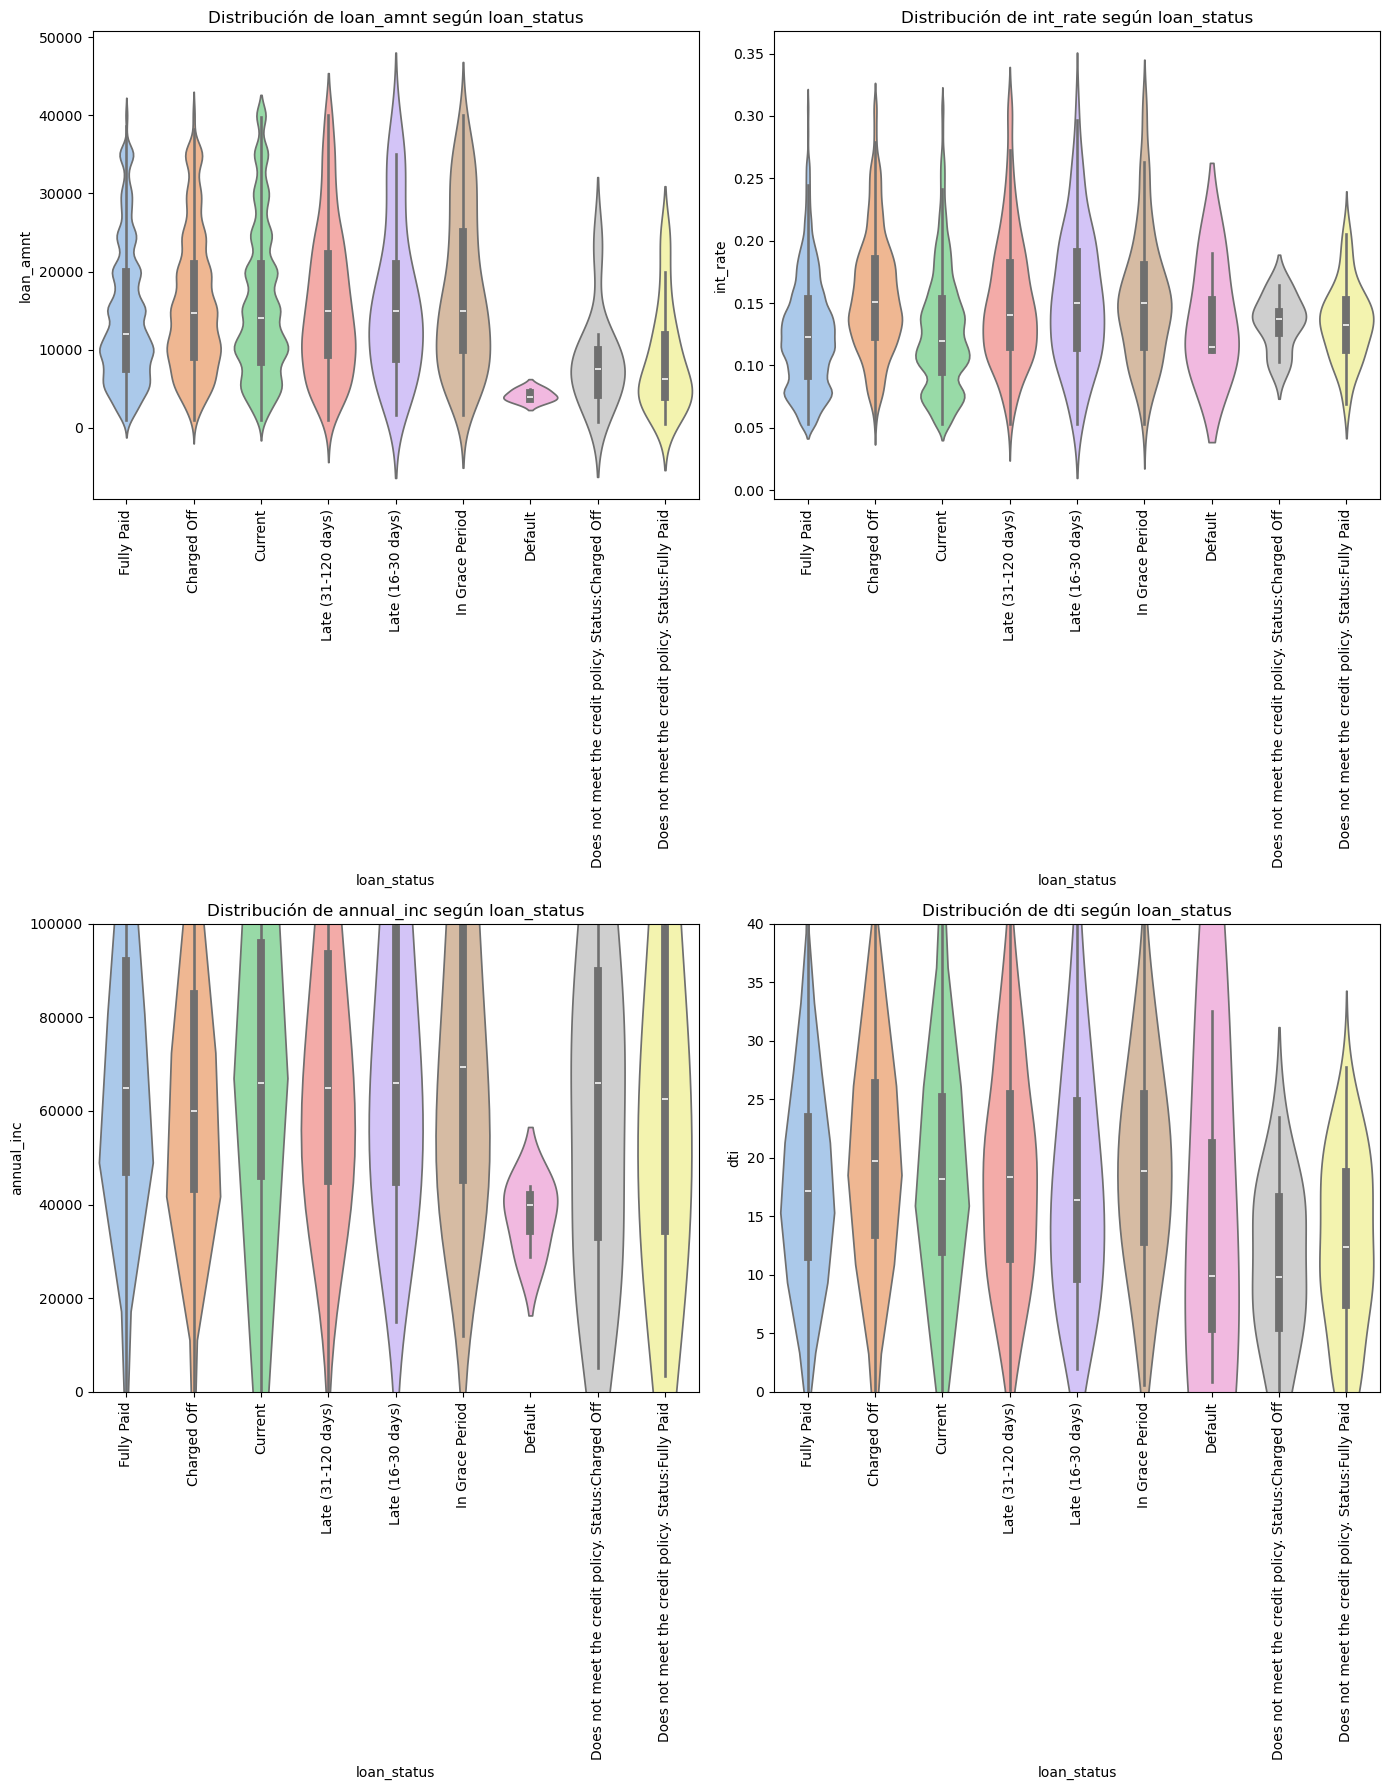

In [10]:
columnas = ["loan_amnt", "int_rate", "annual_inc", "dti"]

limites = {
    "loan_amnt": None, 
    "int_rate": None, 
    "annual_inc": (0, 100000), 
    "dti": (0, 40) 
}

plt.figure(figsize=(14, 18))

for i, var in enumerate(columnas, 1):
    plt.subplot(2, 2, i)

    sns.violinplot(x="loan_status",
                   y=var,
                   data=df_limpio,
                   palette="pastel",
                   hue="loan_status",
                   legend=False)
    
    # Ajustar los límites del eje Y según la variable
    if limites[var] is not None:
        plt.ylim(limites[var])
    
    plt.xticks(rotation=90)
    plt.title(f"Distribución de {var} según loan_status")

plt.tight_layout()
plt.show()


In [11]:
#en el dti podemos ver como al aumentar relacion deuda-ingreso hay mas impagos, cuando esta baja hay mas pagados
#con el anual_int no podemos ver tan clara esta relacion

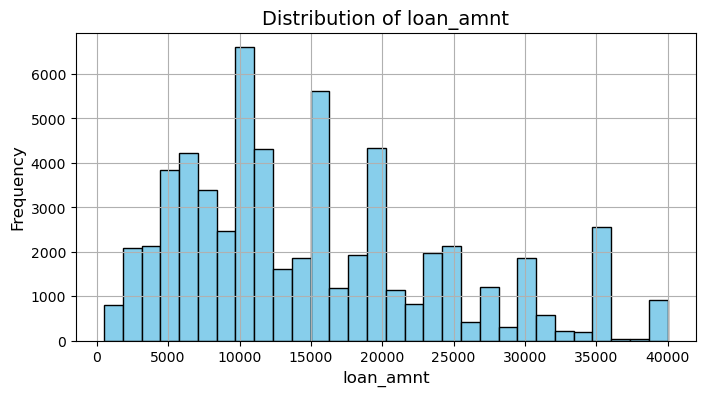

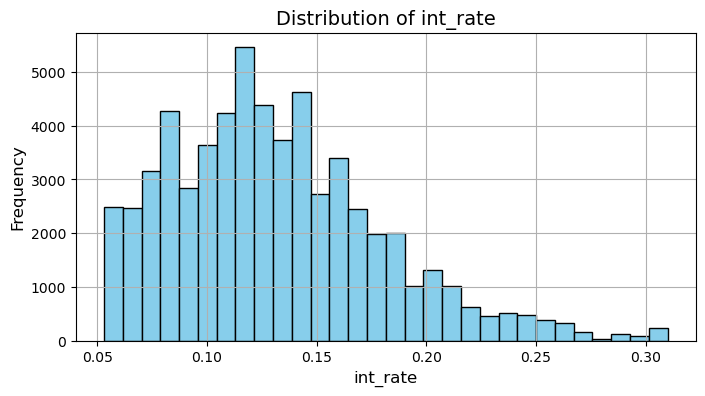

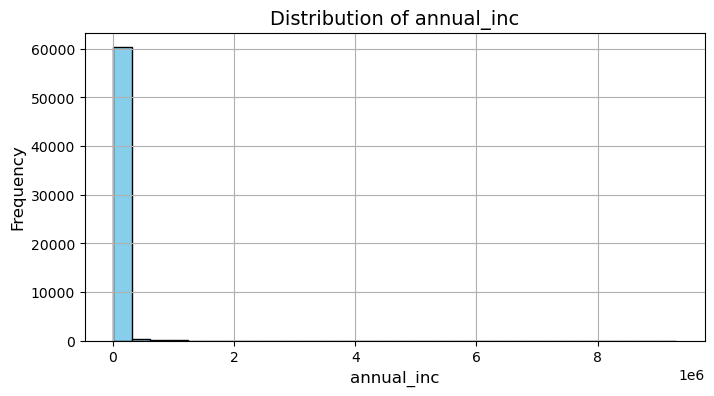

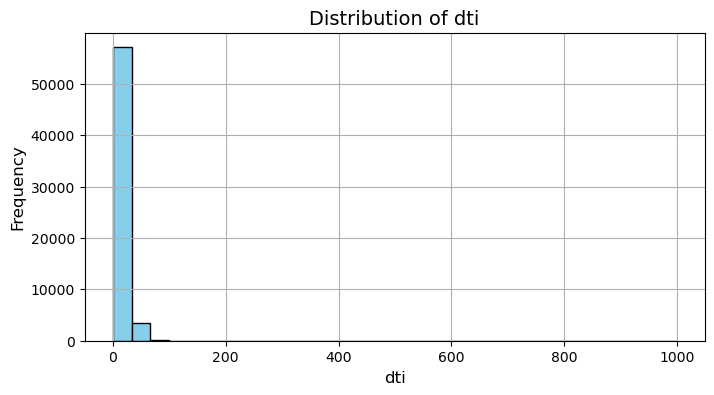

In [12]:
for i in columnas:
    plt.figure(figsize=(8, 4))
    plt.hist(df_limpio[i].dropna(), bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {i}', fontsize=14)
    plt.xlabel(i, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(True)
    plt.show()

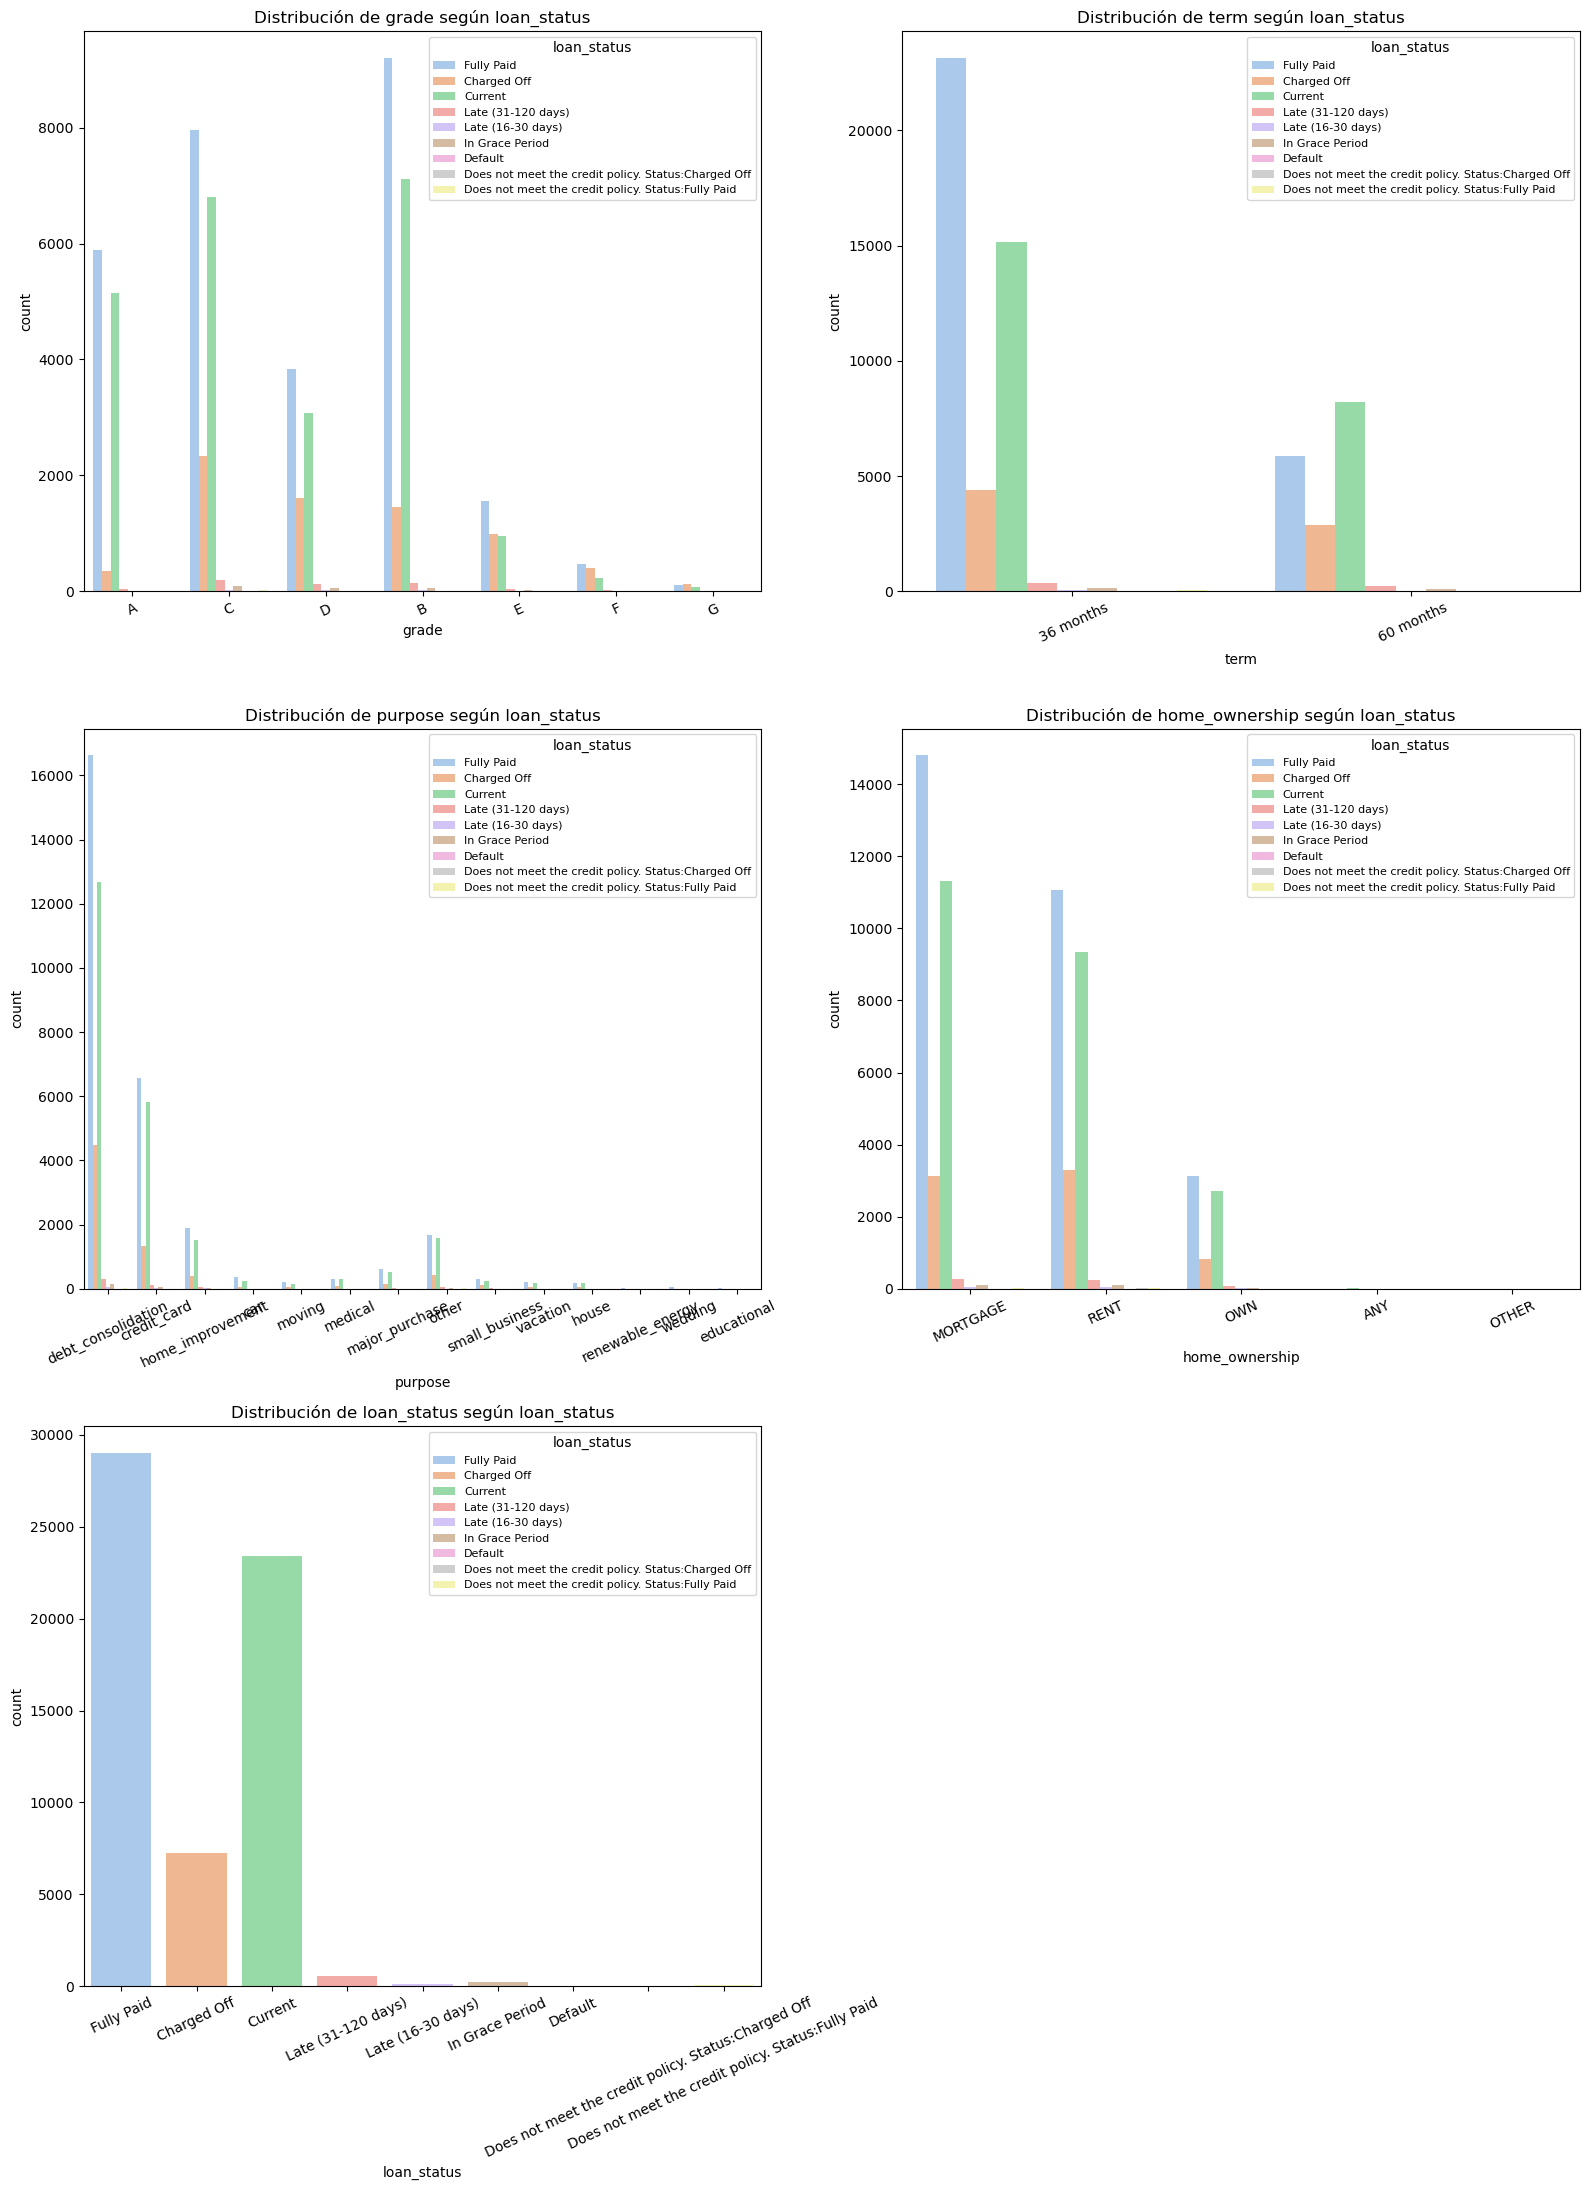

In [13]:
columnas_categoricas = ["grade", "term", "purpose", "home_ownership", "loan_status"]

plt.figure(figsize=(16, 22))

for i, columna in enumerate(columnas_categoricas, 1):
    plt.subplot(3, 2, i)
    
    sns.countplot(data = df_limpio,
                  x = columna,
                  palette = "pastel",
                  hue = "loan_status")
    
    plt.title(f"Distribución de {columna} según loan_status")
    plt.xticks(rotation = 25)
    plt.legend(title = "loan_status",
               fontsize = 8,
               title_fontsize = 10,
               loc = "upper right")
    
plt.tight_layout()
plt.show()

In [14]:
#Valores que no se han convertido bien
valores_invalidos = df_limpio[pd.to_numeric(df_limpio["int_rate"], errors = "coerce").isna()]
print(valores_invalidos)

                                            id  loan_amnt  funded_amnt term  \
44403  Total amount funded in policy code 2: 0        NaN          NaN  NaN   

       int_rate  installment grade emp_length  annual_inc  dti  \
44403       NaN          NaN   NaN        NaN         NaN  NaN   

       fico_range_high  fico_range_low  revol_util loan_status  out_prncp  \
44403              NaN             NaN         NaN         NaN        NaN   

       total_rec_prncp  total_rec_int  last_fico_range_high  \
44403              NaN            NaN                   NaN   

       last_fico_range_low  open_acc  pub_rec  inq_last_6mths purpose  \
44403                  NaN       NaN      NaN             NaN     NaN   

      home_ownership  recoveries  num_tl_90g_dpd_24m  delinq_2yrs  
44403            NaN         NaN                 NaN          NaN  


In [15]:
df_limpio["int_rate"] = df_limpio["int_rate"].astype(str)
df_limpio["int_rate"] = df_limpio["int_rate"].str.rstrip("%")
df_limpio["int_rate"] = pd.to_numeric(df_limpio["int_rate"], errors = "coerce") / 100

valores_invalidos = df_limpio[df_limpio["int_rate"].isna()]
print("Valores no convertidos correctamente (NaN):")
print(valores_invalidos)

Valores no convertidos correctamente (NaN):
                                            id  loan_amnt  funded_amnt term  \
44403  Total amount funded in policy code 2: 0        NaN          NaN  NaN   

       int_rate  installment grade emp_length  annual_inc  dti  \
44403       NaN          NaN   NaN        NaN         NaN  NaN   

       fico_range_high  fico_range_low  revol_util loan_status  out_prncp  \
44403              NaN             NaN         NaN         NaN        NaN   

       total_rec_prncp  total_rec_int  last_fico_range_high  \
44403              NaN            NaN                   NaN   

       last_fico_range_low  open_acc  pub_rec  inq_last_6mths purpose  \
44403                  NaN       NaN      NaN             NaN     NaN   

      home_ownership  recoveries  num_tl_90g_dpd_24m  delinq_2yrs  
44403            NaN         NaN                 NaN          NaN  


In [16]:
n_nans = df_limpio.isnull().sum().to_frame(name = "null_counts")
n_nans.reset_index(inplace=True)
n_nans.columns = ["columna", "numero_nans"]
n_nans #Para ver cuantos nans tiene cada columna

,columna,numero_nans
0,id,0
1,loan_amnt,1
2,funded_amnt,1
3,term,1
4,int_rate,1
5,installment,1
6,grade,1
7,emp_length,3973
8,annual_inc,1
9,dti,54


In [17]:
# Limpieza de columnas
#Limpieza de las filas con nans en base a term, ya que no sirven
pd.set_option("display.max_rows", 30)
df_limpio = df_limpio.dropna(subset = ["term"])

# Columna term a term_months para dejar solo un int8
df_limpio["term_months"] = pd.to_numeric(df_limpio["term"].str.extract(r"(\d+)")[0], errors = "coerce").astype(np.int8)
df_limpio = df_limpio.drop(columns=["term"])

# Columna emp_length a emp_length_years para eliminar la cadena "years"
df_limpio["emp_length_years"] = df_limpio["emp_length"].str.replace(r"[^0-9+]", "", regex = True)
df_limpio = df_limpio.drop(columns=["emp_length"])

df_limpio

,id,loan_amnt,funded_amnt,int_rate,installment,grade,annual_inc,dti,fico_range_high,fico_range_low,revol_util,loan_status,out_prncp,total_rec_prncp,total_rec_int,last_fico_range_high,last_fico_range_low,open_acc,pub_rec,inq_last_6mths,purpose,home_ownership,recoveries,num_tl_90g_dpd_24m,delinq_2yrs,term_months,emp_length_years
0,68466916,25000.0,25000.0,0.000749,777.55,A,109000.0,26.02,749.0,745.0,54.3,Fully Paid,0.00,25000.00,1224.23,724.0,720.0,9.0,0.0,1.0,debt_consolidation,MORTGAGE,0.0,0.0,0.0,36,10+
1,68426865,20000.0,20000.0,0.001485,691.84,C,110000.0,12.45,694.0,690.0,84.5,Fully Paid,0.00,20000.00,4889.01,694.0,690.0,8.0,0.0,0.0,credit_card,RENT,0.0,0.0,0.0,36,6
2,68394562,30000.0,30000.0,0.001577,1051.31,D,175000.0,18.50,729.0,725.0,50.3,Fully Paid,0.00,30000.00,3903.77,734.0,730.0,9.0,0.0,1.0,home_improvement,MORTGAGE,0.0,0.0,0.0,36,2
3,68376953,20000.0,20000.0,0.001199,664.20,C,78000.0,27.10,709.0,705.0,48.2,Charged Off,0.00,12522.42,3417.20,579.0,575.0,15.0,0.0,0.0,debt_consolidation,MORTGAGE,1650.0,0.0,0.0,36,10+
4,68537434,16000.0,16000.0,0.001148,351.73,B,65000.0,21.16,709.0,705.0,53.9,Charged Off,0.00,3188.01,2112.17,644.0,640.0,13.0,1.0,0.0,debt_consolidation,RENT,1746.8,0.0,0.0,60,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60694,90306865,30000.0,30000.0,0.000949,629.91,B,125000.0,18.87,734.0,730.0,54.2,Current,17257.58,12742.42,5485.43,709.0,705.0,15.0,0.0,1.0,other,MORTGAGE,0.0,0.0,1.0,60,1
60695,89774741,32000.0,32000.0,0.001559,771.23,C,106500.0,33.50,699.0,695.0,73.6,Charged Off,0.00,10912.28,9111.98,654.0,650.0,24.0,0.0,0.0,debt_consolidation,MORTGAGE,0.0,0.0,0.0,60,6
60696,90304259,35000.0,35000.0,0.001559,843.53,C,180000.0,13.09,694.0,690.0,91.0,Fully Paid,0.00,35000.00,1934.34,714.0,710.0,17.0,0.0,3.0,debt_consolidation,MORTGAGE,0.0,0.0,2.0,60,10+
60697,88948489,25000.0,25000.0,0.001559,602.52,C,70000.0,31.49,704.0,700.0,67.3,Current,15294.23,9705.77,7713.18,684.0,680.0,21.0,0.0,1.0,debt_consolidation,MORTGAGE,0.0,0.0,0.0,60,10+


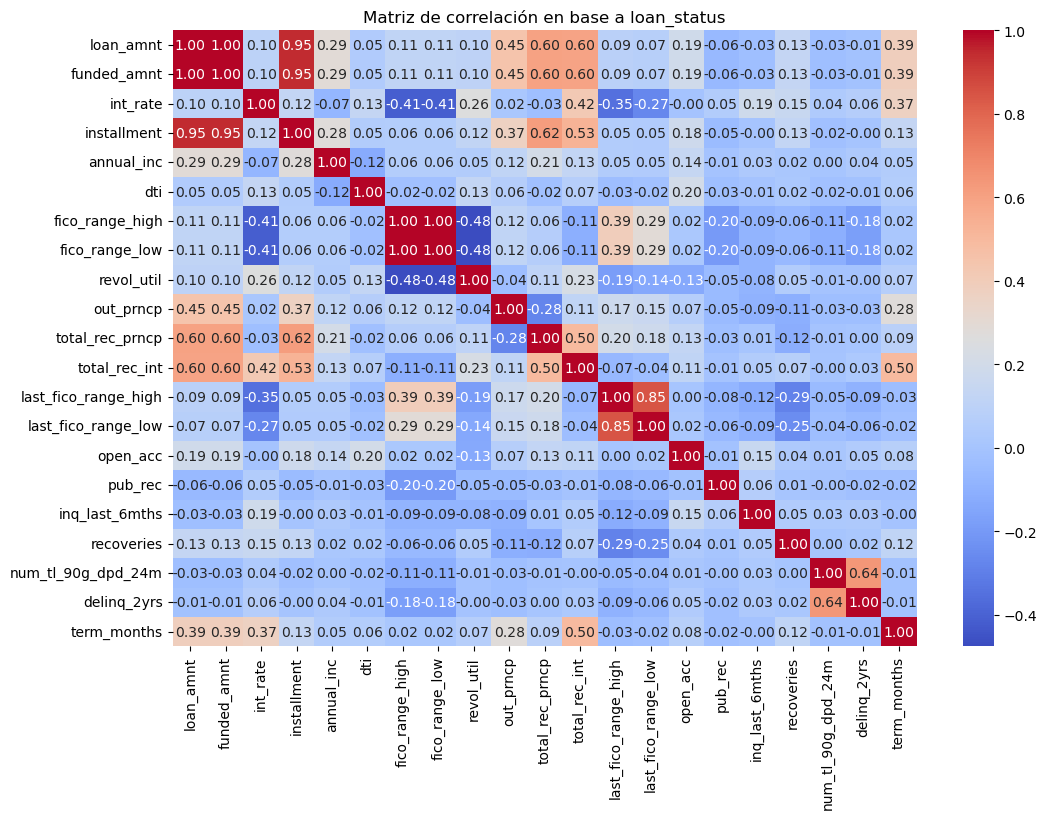

In [18]:
df_numerico = df_limpio.select_dtypes(include = [np.number])

matriz_correlacion = df_numerico.corr()

plt.figure(figsize = (12, 8))

sns.heatmap(matriz_correlacion,
            annot = True,
            cmap = "coolwarm",
            fmt = ".2f")

plt.title("Matriz de correlación en base a loan_status")
plt.show()

In [19]:
#aqui no se puede relacionar con las variables categoricas(entre ellas loan_status) creo que habria que quitarlo y hacerlo despues del onehotencoder y label encoder.

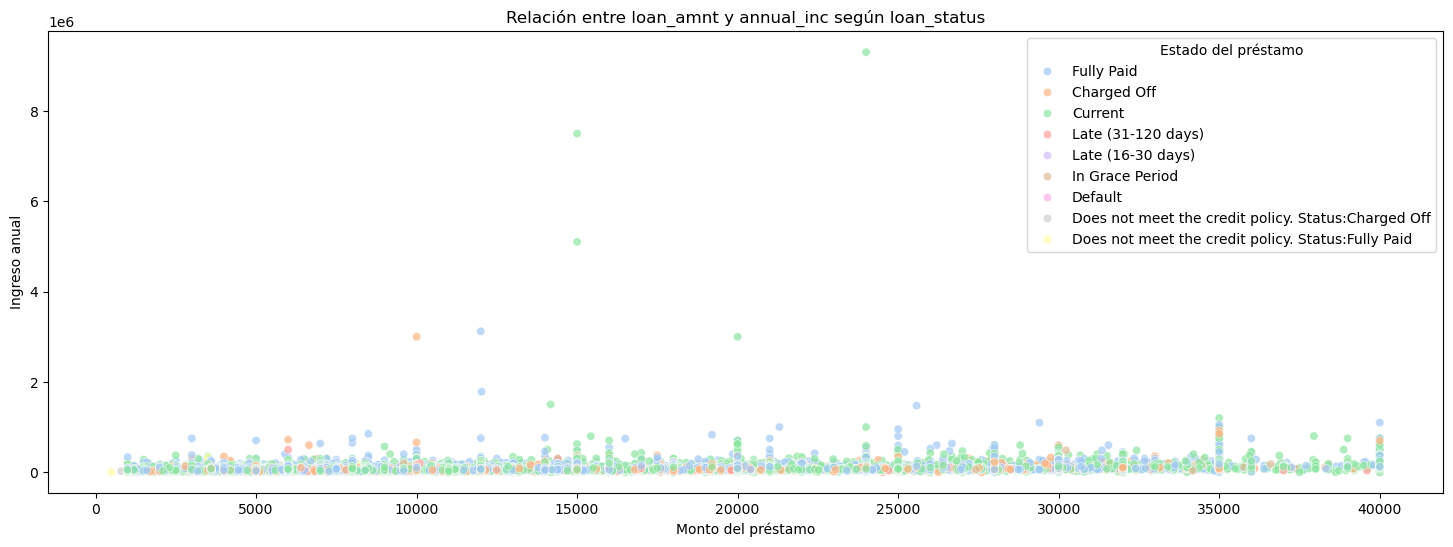

In [20]:
plt.figure(figsize = (18, 6))
sns.scatterplot(data = df_limpio,
                x = "loan_amnt",
                y = "annual_inc",
                hue = "loan_status",
                palette = "pastel",
                alpha = 0.7)

plt.title("Relación entre loan_amnt y annual_inc según loan_status")
plt.xlabel("Monto del préstamo")
plt.ylabel("Ingreso anual")

plt.legend(title = "Estado del préstamo",
           loc = "upper right")

plt.show()

In [21]:
df_limpio.to_csv('df_limpio.csv', index=False)

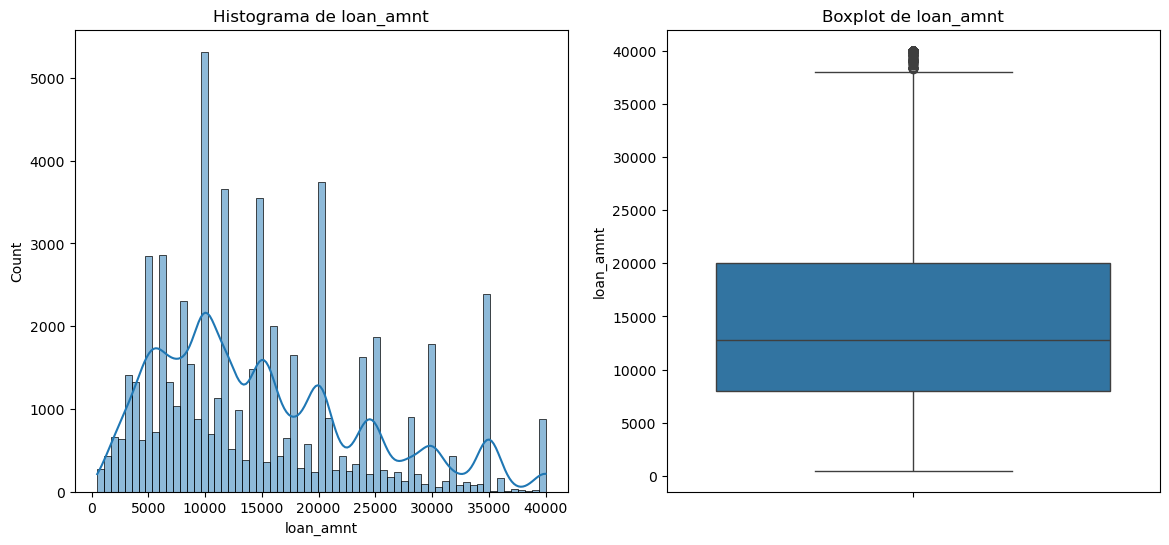

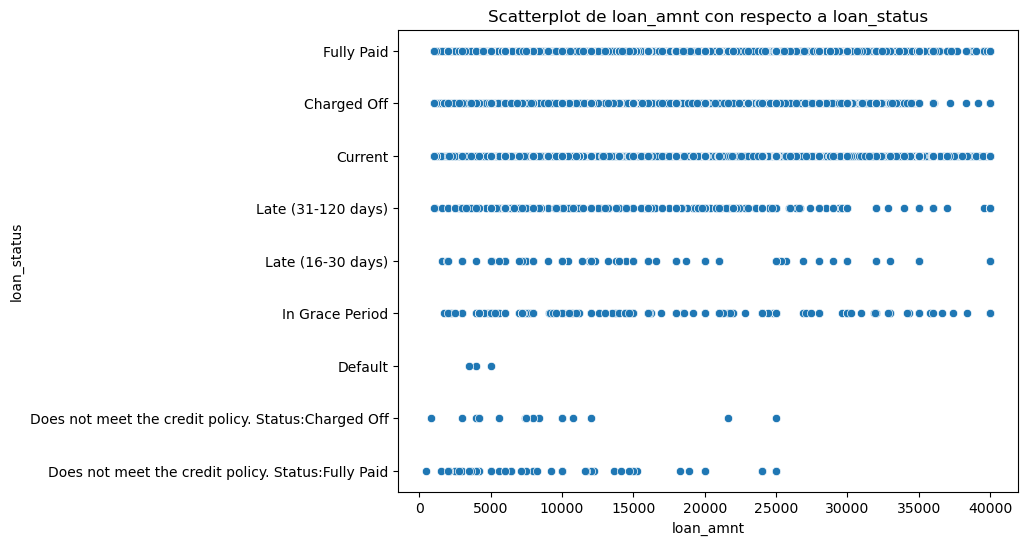

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import KNNImputer

#función para mostrar visualizaciones según el tipo de dato
def visualizar_columna(df, columna, loan_status_col):
    plt.figure(figsize=(14, 6))
    
    #categórica
    if df[columna].dtype == 'object':
        plt.subplot(1, 2, 1)
        sns.countplot(x=columna, data=df)
        plt.title(f'Distribución de la columna {columna}')
        
        plt.subplot(1, 2, 2)
        sns.boxplot(x=columna, y=loan_status_col, data=df)
        plt.title(f'Boxplot de {columna} con respecto a {loan_status_col}')
    
    #continua
    else:
        plt.subplot(1, 2, 1)
        sns.histplot(df[columna], kde=True)
        plt.title(f'Histograma de {columna}')
        
        plt.subplot(1, 2, 2)
        sns.boxplot(y=df[columna])
        plt.title(f'Boxplot de {columna}')
        
        # Scatterplot con la columna precio
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=columna, y=loan_status_col, data=df)
        plt.title(f'Scatterplot de {columna} con respecto a {loan_status_col}')
    
    plt.show()

#ejemplo
visualizar_columna(df_limpio, 'loan_amnt', 'loan_status') #podemos cambiar las columnas si queremos


In [23]:

print(df_limpio.columns)


Index(['id', 'loan_amnt', 'funded_amnt', 'int_rate', 'installment', 'grade',
       'annual_inc', 'dti', 'fico_range_high', 'fico_range_low', 'revol_util',
       'loan_status', 'out_prncp', 'total_rec_prncp', 'total_rec_int',
       'last_fico_range_high', 'last_fico_range_low', 'open_acc', 'pub_rec',
       'inq_last_6mths', 'purpose', 'home_ownership', 'recoveries',
       'num_tl_90g_dpd_24m', 'delinq_2yrs', 'term_months', 'emp_length_years'],
      dtype='object')


In [24]:
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import KNNImputer
import seaborn as sns
import matplotlib.pyplot as plt

#eliminar outliers usando la Valla de Tukey(porque no sigue una distribucion normal)
def eliminar_outliers_tukey(df, columna):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtrado = df[(df[columna] >= lower_bound) & (df[columna] <= upper_bound)]
    return df_filtrado

chunksize = 10000 
df_limpio_chunks = []

for chunk in pd.read_csv('df_limpio.csv', chunksize=chunksize):
    chunk = eliminar_outliers_tukey(chunk, 'loan_amnt') 
    df_limpio_chunks.append(chunk)

df_limpio = pd.concat(df_limpio_chunks, ignore_index=True)

#labelEncoder solo a columnas con 2 categorías
def procesar_label_encoder(df):
    le = LabelEncoder()
    for col in df.select_dtypes(include=['object']):
        if df[col].nunique() == 2:
            df[col] = le.fit_transform(df[col])
    return df

df_limpio = procesar_label_encoder(df_limpio)  

def procesar_one_hot_encoder_sparso(df):
    ohe = OneHotEncoder(sparse_output=True, drop='first')  
    cat_cols = df.select_dtypes(include=['object']).columns
    
    for col in cat_cols:
        encoded_cols = ohe.fit_transform(df[[col]])  
        encoded_df = pd.DataFrame.sparse.from_spmatrix(encoded_cols, columns=ohe.get_feature_names_out([col]))
        df = pd.concat([df, encoded_df], axis=1).drop(columns=[col]) 

    return df

df_limpio = procesar_one_hot_encoder_sparso(df_limpio)  

In [25]:

def imputar_knn_columnas_con_nan(df, chunk_size=1000):
    imputer = KNNImputer(n_neighbors=3)
    columnas_con_nan = df.columns[df.isna().any()]  
    columnas_sin_nan = df.columns[~df.isna().any()]  
    df_nan = df[columnas_con_nan]
    n_rows = df_nan.shape[0]
    
    df_imputado = pd.DataFrame()
    
    for i in range(0, n_rows, chunk_size):
        df_chunk = df_nan.iloc[i:i+chunk_size]
        df_chunk_imputado = pd.DataFrame(imputer.fit_transform(df_chunk), columns=df_chunk.columns)
        
        df_imputado = pd.concat([df_imputado.reset_index(drop=True), df_chunk_imputado.reset_index(drop=True)], axis=0)
    
    df_final = pd.concat([df[columnas_sin_nan].reset_index(drop=True), df_imputado.reset_index(drop=True)], axis=1)
    
    return df_final

df_limpio = imputar_knn_columnas_con_nan(df_limpio)

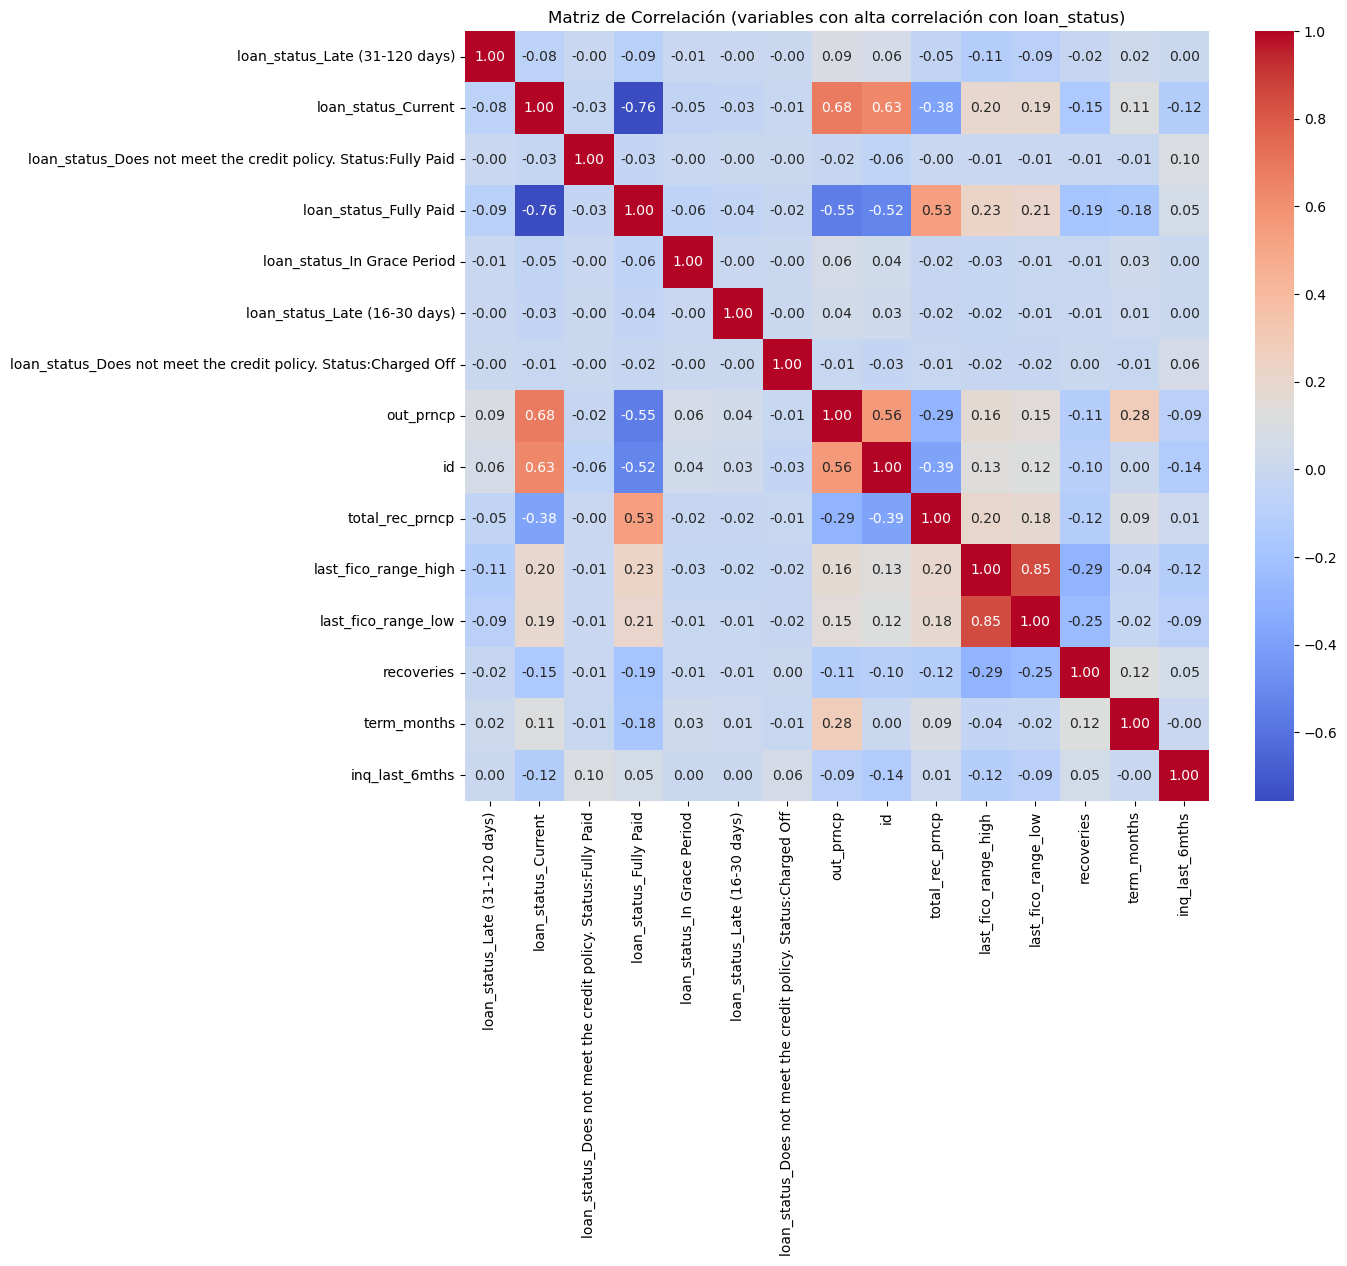

In [26]:

import seaborn as sns
import matplotlib.pyplot as plt

loan_status_cols = [
    'loan_status_Current',
    'loan_status_Does not meet the credit policy. Status:Charged Off',
    'loan_status_Does not meet the credit policy. Status:Fully Paid',
    'loan_status_Fully Paid',
    'loan_status_In Grace Period',
    'loan_status_Late (16-30 days)',
    'loan_status_Late (31-120 days)'
]


corr_matrix = df_limpio.corr()

corr_target = corr_matrix[loan_status_cols].abs().max(axis=1).sort_values(ascending=False)  
high_corr_features = corr_target[corr_target > 0.1].index  

filtered_corr_matrix = corr_matrix.loc[high_corr_features, high_corr_features]

plt.figure(figsize=(12, 10))  
sns.heatmap(filtered_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f") 
plt.title("Matriz de Correlación (variables con alta correlación con loan_status)")
plt.show()



/home/hacker/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:869: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


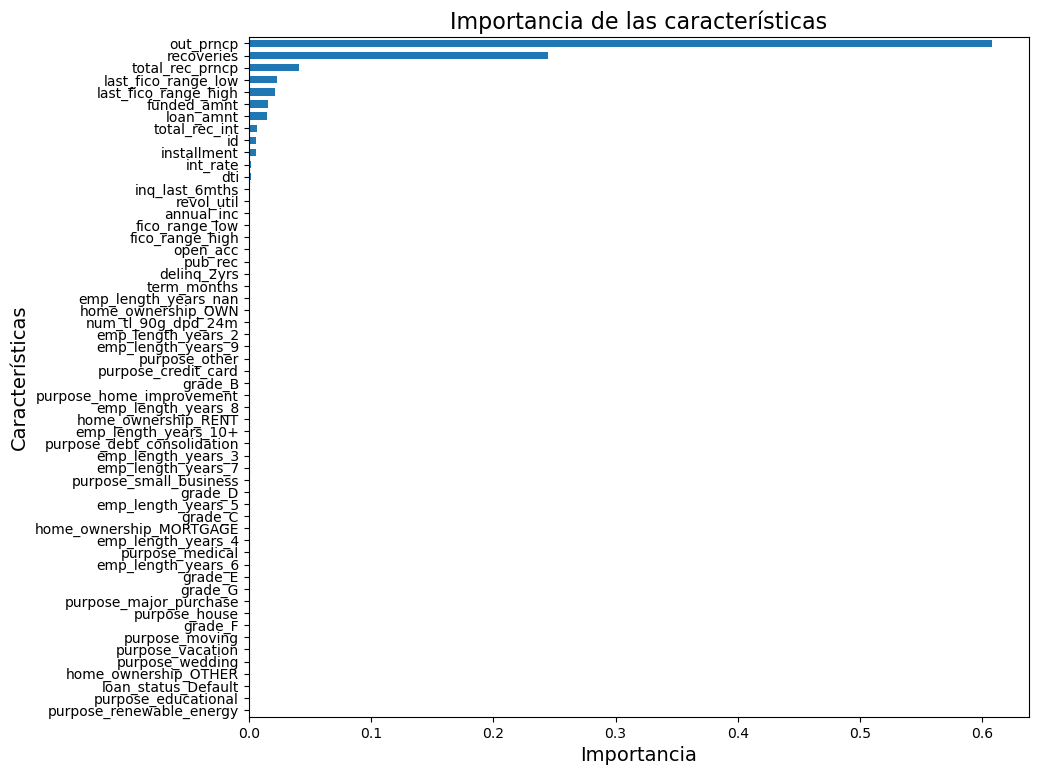

In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

loan_status_cols = [
    'loan_status_Current',
    'loan_status_Does not meet the credit policy. Status:Charged Off',
    'loan_status_Does not meet the credit policy. Status:Fully Paid',
    'loan_status_Fully Paid',
    'loan_status_In Grace Period',
    'loan_status_Late (16-30 days)',
    'loan_status_Late (31-120 days)'
]

X = df_limpio.drop(loan_status_cols, axis=1)  
y = df_limpio['loan_status_Fully Paid'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo = RandomForestRegressor(random_state=42)
modelo.fit(X_train, y_train)

importances = modelo.feature_importances_
feature_importances = pd.Series(importances, index=X.columns)

plt.figure(figsize=(12, 8))  
feature_importances.sort_values().plot(kind='barh', width=0.6) 

plt.title('Importancia de las características', fontsize=16)
plt.xlabel('Importancia', fontsize=14)
plt.ylabel('Características', fontsize=14)

plt.subplots_adjust(left=0.3, right=0.95, top=0.95, bottom=0.1)

plt.show()


In [28]:
#conclusiones:
#el saldo pendiente , las recuperaciones por impago y el total principal devuelto son factores determinantes para clasificar el estado de los prestamos
#el puntuaje FICO tanto en el pasado como en el presente, es otro indicador clave de la probabilidad del pago del prestamo.